## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
#Keras imports
import tensorflow as tf
import tensorflow.keras.preprocessing as preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from PIL import Image

Using TensorFlow backend.


## Pathways

In [2]:
not_path = os.listdir("../Data/Images")
not_path.remove(".DS_Store") #it likes to pop up from time to time

data_path = os.path.join('..', 'Data')

train_dir = os.path.join(data_path, 'ExModeling_train')
test_dir = os.path.join(data_path, 'ExModeling_test')
val_dir = os.path.join(data_path, 'ExModeling_val')

Ex_test_path = os.path.join(data_path, 'ExModeling_test')
Ex_train_path = os.path.join(data_path, 'ExModeling_train')
Ex_val_path = os.path.join(data_path, 'ExModeling_val')

## vis method

In [3]:
def vis_history(history): 
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

## Modeling

In [4]:
img_size = (452, 411) #avg training image size, img gen is fine but model does not like the tuple for some reason keep pecking at it
bch_size = 20

In [5]:
img_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=False, vertical_flip=False)

train_generator = img_gen.flow_from_directory(
    train_dir,
    target_size=(img_size),
    color_mode='rgb',
    batch_size=bch_size,
    class_mode='categorical')

validation_generator = img_gen.flow_from_directory(
    val_dir, 
    target_size=(img_size), 
    color_mode='rgb',
    batch_size=bch_size, 
    class_mode='categorical')

test_generator = img_gen.flow_from_directory(
    test_dir,
    target_size=(img_size),
    color_mode='rgb',
    batch_size=bch_size,
    class_mode='categorical',
    shuffle=False)

Found 752 images belonging to 4 classes.
Found 98 images belonging to 4 classes.
Found 92 images belonging to 4 classes.


The main changes here are going to be a better fitting image size and more epochs than the prior iterations of this model. A better fitting image size will in theory make the model better at assessing the images and I want to use more epochs as it did not seem quite done learning after 10 last time.

In [6]:
alpha = models.Sequential() 
alpha.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(452, 411, 3)))
alpha.add(layers.Conv2D(64, (3, 3), activation='relu'))
alpha.add(layers.MaxPooling2D((2, 2)))
alpha.add(layers.Conv2D(128, (3, 3), activation='relu'))
alpha.add(layers.MaxPooling2D((2, 2)))
alpha.add(layers.Conv2D(128, (3, 3)))
alpha.add(layers.MaxPooling2D((2, 2)))
alpha.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
alpha.add(layers.MaxPooling2D((2, 2)))
alpha.add(layers.Flatten())
alpha.add(layers.Dense(64, activation='relu'))
alpha.add(layers.Dense(64, activation='relu'))
alpha.add(layers.Dense(128, activation='relu',))
alpha.add(layers.Dense(4, activation='softmax'))

alpha.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_alpha = alpha.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15, 
    validation_data=validation_generator,
    validation_steps=50)

W1022 20:33:06.311758 4725431744 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1022 20:33:06.345934 4725431744 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1022 20:33:06.353985 4725431744 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1022 20:33:06.410812 4725431744 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.m

Epoch 1/15
100/100 [==============================] - 8330s 83s/step - loss: 47.2761 - acc: 0.4052 - val_loss: 35.2329 - val_acc: 0.3878
Epoch 2/15
100/100 [==============================] - 2989s 30s/step - loss: 25.9263 - acc: 0.5782 - val_loss: 17.7986 - val_acc: 0.6327
Epoch 3/15
100/100 [==============================] - 1849s 18s/step - loss: 11.9269 - acc: 0.6545 - val_loss: 7.1291 - val_acc: 0.6429
Epoch 4/15
100/100 [==============================] - 1832s 18s/step - loss: 4.2523 - acc: 0.6932 - val_loss: 2.3080 - val_acc: 0.6531
Epoch 5/15
100/100 [==============================] - 1814s 18s/step - loss: 1.6863 - acc: 0.6940 - val_loss: 1.4160 - val_acc: 0.6531
Epoch 6/15
100/100 [==============================] - 1862s 19s/step - loss: 1.1794 - acc: 0.7492 - val_loss: 1.7015 - val_acc: 0.5306
Epoch 7/15
100/100 [==============================] - 1842s 18s/step - loss: 1.0284 - acc: 0.7725 - val_loss: 1.2681 - val_acc: 0.6327
Epoch 8/15
100/100 [==============================

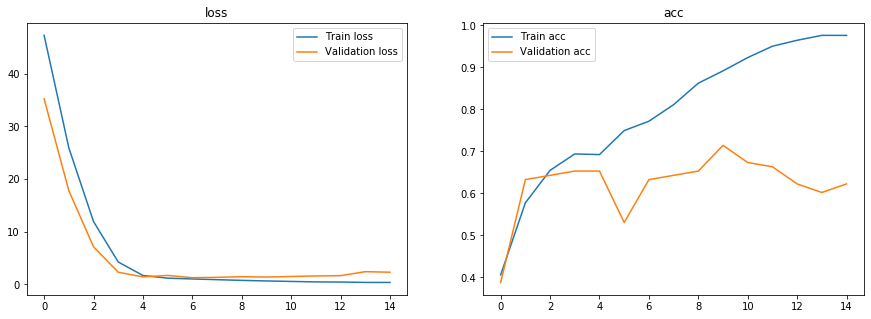

In [8]:
vis_history(history_alpha)

Perhaphs the extra 5 epochs caused more harm than good and led to some overfitting after epoch 10. I'll try this again. After that I'll try something else out.

In [9]:
alpha.save('alpha')

In [10]:
beta = models.Sequential() 
beta.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(452, 411, 3)))
beta.add(layers.Conv2D(64, (3, 3), activation='relu'))
beta.add(layers.MaxPooling2D((2, 2)))
beta.add(layers.Conv2D(128, (3, 3), activation='relu'))
beta.add(layers.MaxPooling2D((2, 2)))
beta.add(layers.Conv2D(128, (3, 3)))
beta.add(layers.MaxPooling2D((2, 2)))
beta.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
beta.add(layers.MaxPooling2D((2, 2)))
beta.add(layers.Flatten())
beta.add(layers.Dense(64, activation='relu'))
beta.add(layers.Dense(64, activation='relu'))
beta.add(layers.Dense(128, activation='relu',))
beta.add(layers.Dense(4, activation='softmax'))

beta.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_beta = beta.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 2721s 27s/step - loss: 47.2598 - acc: 0.4133 - val_loss: 35.0263 - val_acc: 0.5602
Epoch 2/10
100/100 [==============================] - 1888s 19s/step - loss: 25.8409 - acc: 0.6147 - val_loss: 17.7817 - val_acc: 0.5918
Epoch 3/10
100/100 [==============================] - 2043s 20s/step - loss: 11.8881 - acc: 0.6732 - val_loss: 7.1824 - val_acc: 0.6673
Epoch 4/10
100/100 [==============================] - 1863s 19s/step - loss: 4.2498 - acc: 0.6978 - val_loss: 2.3909 - val_acc: 0.6459
Epoch 5/10
100/100 [==============================] - 2109s 21s/step - loss: 1.6672 - acc: 0.7090 - val_loss: 1.5210 - val_acc: 0.6714
Epoch 6/10
100/100 [==============================] - 1820s 18s/step - loss: 1.2149 - acc: 0.7308 - val_loss: 1.3102 - val_acc: 0.6602
Epoch 7/10
100/100 [==============================] - 1854s 19s/step - loss: 1.0384 - acc: 0.7570 - val_loss: 1.3336 - val_acc: 0.6429
Epoch 8/10
100/100 [==============================